# Background and Summary

Visa first entered Taiwan in 1989. In Winter 2005, Credit Card Debt Crisis exploded in Taiwan with 700,000 people owed the financial institutions for more than 1 million New Taiwan dollars (NTD) on average. Currently most people on the island own credit cards, but they still mainly use cash. Credit cards are common for purchases made in department stores. 

Taiwanese average annual salary is USD 26,148 (~ NTD 784,440)


This dataset was collected from April 2005 to September 2005 (with a response variable for October 2005) on the brink of the Debt Crisis.

1. Comparison between Taiwan and US:

        a. average debt: NTD 3,970 (USD 6,354 2019)
        b. average credit utilization rate: 37.3% (US 30% 2019)
        c. average credit line: NTD 167,484 ~= USD 5583 (USD 8541 Q1 2019)
        d. credit card balance 90+ days delinquent: 1.3% (US 8.01% in 2018)

2. Distribution of bill amount, payment, debt, pay status for entire dataset

    In the 30,000 individuals for 6 months, the distributions were right skewed.
        a. Pay Status values -2 and 0 were not clearly described in the UCI web site or the data owner's paper. I assumed that -2, -1, and 0 represented users paid on time or earlier than the due date. The Pay Status distribution has very long tail showing people not paying for up to 8 months.
        b. Bill amount distribution was right skewed with the majority of no balance (value 0).
        c. Payment distribution was right skewed with the majority of the value 0 (no payment).
        d. Debt distribution was right skewed with the majority of the value 0 (no debt).
        e. Credit Utilization distribution was right skewed with the majority of the value 0 (no credit used).

3. Credit Card holders in demographic groups (top ranking):

        a. Credit Card holders by age ranking: 21-30, 31-40
        b. Credit Card holders by gender ranking: female, male
        c. Credit Card holders by marriage ranking: single, married
        d. Credit Card holders by education ranking: University, Graduate School, High School

4. Payment, bill amount, debt, credit utilization in each group (top ranking)

        a. Payment ranking: 1000-9999, 0, 100-999
        b. Bill Amount ranking: 10000-99999, 1000-9999, 0, 100000-1000000
        c. Credit utilization ranking: >50%, <10%
        d. Debt ranking: 10000-99999, 1000-9999

5. Drill down metrics by demographic groups with high risks of default (top ranking):

    a. Default in October
        21-30 female single univ 9%
        21-30 female single grad school 7.4%
        21-30 male single univ 6.6%
        31-40 female married univ 6.1%
    b. Pay status, owed for 8 months
        41-50 male married grad school 18%
        31-40 male single univ 18%
        21-40 male single univ 14%
        21-30 female single univ 7.1%
        21-30 female high school 7.1%
    c. Bill amount 100000-1000000 highest bracket
        20-30 female single univ 7.3%
        20-30 female single grad 6.9%
        31-40 female married univ 7.4%
    d. Debt, 100000-1000000 highest bracket
        31-40 male single grad 6%
        31-40 female single grad 5.7% 
        31-40 female married grad 5.4%
        21-30 female single grad 5.6% 
        21-30 female single univ 5.5%
    e. Credit utilization > 100% or > 50-100%
        21-30 female single univ 10%
        21-30 male single univ 8% 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('TW_CC_unpivot.csv')
df0 = pd.read_csv('TW_CC_formatted.csv') #pivoted format

df

ID      MONTH  PAY_STATUS  BILL_AMT  PAY_AMT  LIMIT_BAL CATEGORY  \
0           1  September           2      3913        0      20000    21-30   
1           1     August           2      3102      689      20000    21-30   
2           1       July          -1       689        0      20000    21-30   
3           1       June          -1         0        0      20000    21-30   
4           1        May          -2         0        0      20000    21-30   
...       ...        ...         ...       ...      ...        ...      ...   
179995  30000     August           0     48905     1800      50000    41-50   
179996  30000       July           0     49764     1430      50000    41-50   
179997  30000       June           0     36535     1000      50000    41-50   
179998  30000        May           0     32428     1000      50000    41-50   
179999  30000      April           0     15313     1000      50000    41-50   

        BILL_UNPAID  PCT_LIMIT_USED PAY_AMT_CAT BILL_AMT_CAT BILL_UNPAID_CAT  \
0             -3913         0.19565           0    1000-9999    -(9999-1000)   
1             -2413         0.15510     100-999    1000-9999    -(9999-1000)   
2              -689         0.03445           0      100-999      -(999-100)   
3                 0         0.00000           0            0               0   
4                 0         0.00000           0            0               0   
...             ...             ...         ...          ...             ...   
179995       -47105         0.97810   1000-9999  10000-99999  -(99999-10000)   
179996       -48334         0.99528   1000-9999  10000-99999  -(99999-10000)   
179997       -35535         0.73070     100-999  10000-99999  -(99999-10000)   
179998       -31428         0.64856     100-999  10000-99999  -(99999-10000)   
179999       -14313         0.30626     100-999  10000-99999  -(99999-10000)   

       LIMIT_USED_CAT  MONTH_NUM  YEAR     SEX   EDUCATION MARRIAGE  AGE  
0              10-20%          9  2005  female  university  married   24  
1              10-20%          8  2005  female  university  married   24  
2               < 10%          7  2005  female  university  married   24  
3                   0          6  2005  female  university  married   24  
4                   0          5  2005  female  university  married   24  
...               ...        ...   ...     ...         ...      ...  ...  
179995          > 50%          8  2005    male  university  married   46  
179996          > 50%          7  2005    male  university  married   46  
179997          > 50%          6  2005    male  university  married   46  
179998          > 50%          5  2005    male  university  married   46  
179999         30-40%          4  2005    male  university  married   46  

[180000 rows x 19 columns]

In [114]:
df.describe()

#average debt: NT$3,970 (US $6,354)
#average credit utilization rate: 37.3% (US 30%)
#average credit line: NT$167,484 ~= $5583 (US $8541 Q1 2019)

ID     PAY_STATUS      BILL_AMT       PAY_AMT  \
count  180000.000000  180000.000000  1.800000e+05  1.800000e+05   
mean    15000.500000      -0.182439  4.497695e+04  5.275232e+03   
std      8660.278089       1.165641  6.683443e+04  1.784690e+04   
min         1.000000      -2.000000 -3.396030e+05  0.000000e+00   
25%      7500.750000      -1.000000  2.400000e+03  3.900000e+02   
50%     15000.500000       0.000000  1.927000e+04  1.900000e+03   
75%     22500.250000       0.000000  5.741700e+04  4.592000e+03   
max     30000.000000       8.000000  1.664089e+06  1.684259e+06   

            LIMIT_BAL   BILL_UNPAID  PCT_LIMIT_USED     MONTH_NUM      YEAR  \
count   180000.000000  1.800000e+05   180000.000000  180000.00000  180000.0   
mean    167484.322667 -3.970171e+04        0.373048       6.50000    2005.0   
std     129745.859494  6.700117e+04        0.382381       1.70783       0.0   
min      10000.000000 -1.542258e+06       -1.509530       4.00000    2005.0   
25%      50000.000000 -5.279775e+04        0.014387       5.00000    2005.0   
50%     140000.000000 -1.688350e+04        0.250139       6.50000    2005.0   
75%     240000.000000 -1.340000e+02        0.703867       8.00000    2005.0   
max    1000000.000000  1.702347e+06       10.688575       9.00000    2005.0   

                 AGE  
count  180000.000000  
mean       35.485500  
std         9.217776  
min        21.000000  
25%        28.000000  
50%        34.000000  
75%        41.000000  
max        79.000000

In [115]:
#PAY_STATUS analysis

df['PAY_STATUS'].value_counts(normalize=True)
#credit card balance 90+ days delinquent%: 1.3% (US 8.01% in 2018)

 0    0.532883
-1    0.192444
-2    0.135639
 2    0.105356
 1    0.020678
 3    0.007944
 4    0.002517
 7    0.001211
 5    0.000761
 6    0.000411
 8    0.000156
Name: PAY_STATUS, dtype: float64

In [139]:
df.columns

Index(['ID', 'MONTH', 'PAY_STATUS', 'BILL_AMT', 'PAY_AMT', 'LIMIT_BAL',
       'CATEGORY', 'BILL_UNPAID', 'PCT_LIMIT_USED', 'PAY_AMT_CAT',
       'BILL_AMT_CAT', 'BILL_UNPAID_CAT', 'LIMIT_USED_CAT', 'MONTH_NUM',
       'YEAR', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE'],
      dtype='object')

In [197]:
def draw_hist(df, y_max):
    plt.clf()

    fig, ax = plt.subplots(3,2, figsize = (15,15))
    
    metrics = [2,3,4,5,7,8]
    i =  0

    for row in ax: 
        for col in row: 
            measure = df.columns[metrics[i]]
            col.hist(df[measure])
            col.set_title('Monthly Histogram of {}'.format(measure))
            i += 1
            
    plt.show()

<Figure size 432x288 with 0 Axes>

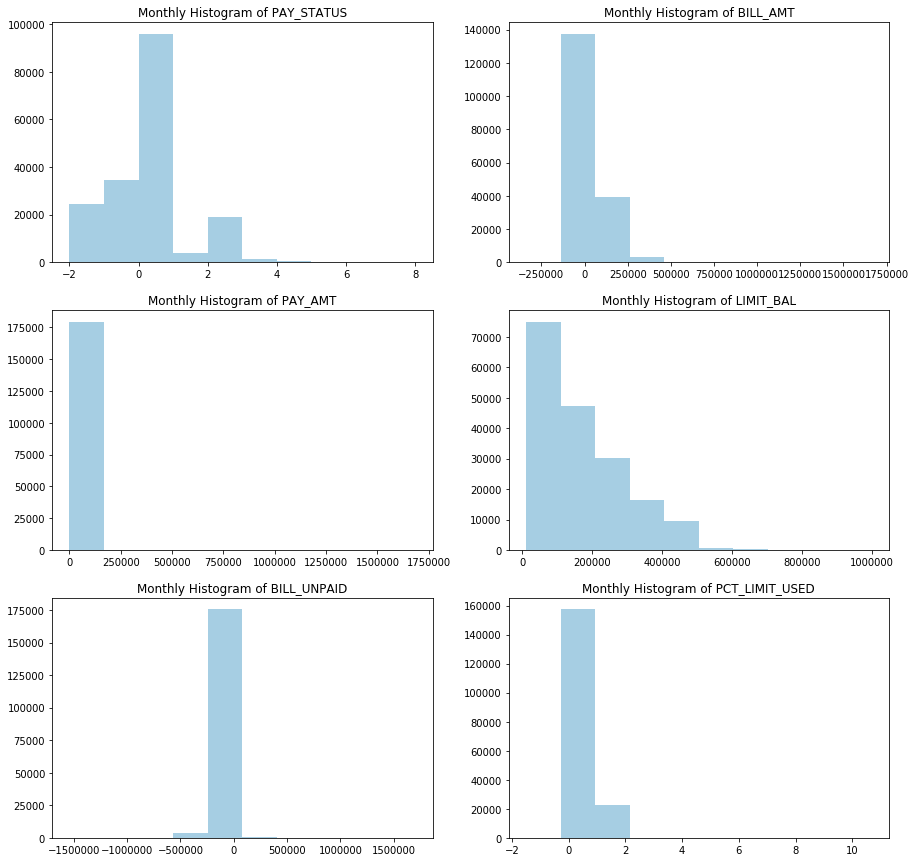

In [198]:
draw_hist(df, 250000)

In [200]:
def draw_bar(df, measureY):
    plt.clf()
    
    pal1 = sns.color_palette("Paired")
    sns.set_palette(pal1)
    
    metricsX = ['CATEGORY','SEX','MARRIAGE','EDUCATION']
    
    for x in metricsX:
        measureX = x
        pd.crosstab(df[measureX],df[measureY]).plot(kind='bar', stacked=True) 
        plt.title('Monthly Stacked Bar Chart of {} by {}'.format(measureY, measureX))
    
    plt.show()


<Figure size 432x288 with 0 Axes>

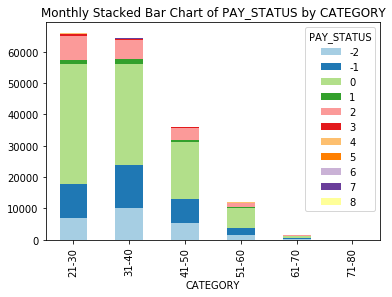

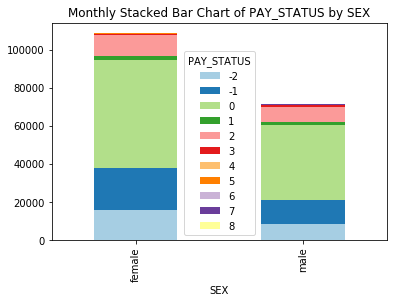

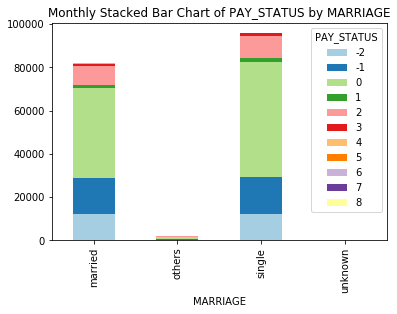

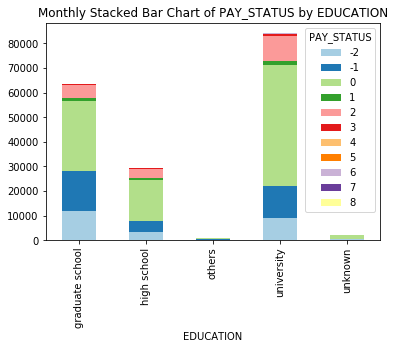

In [201]:
draw_bar(df, 'PAY_STATUS')

#Monthly PAY_STATUS 0 

<Figure size 432x288 with 0 Axes>

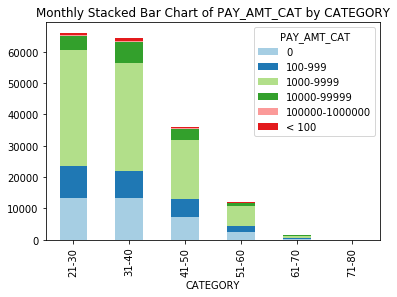

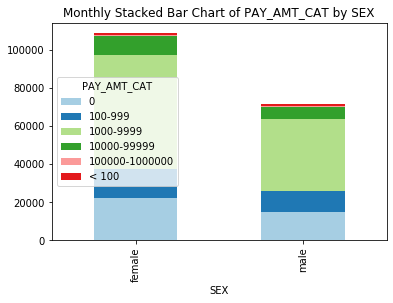

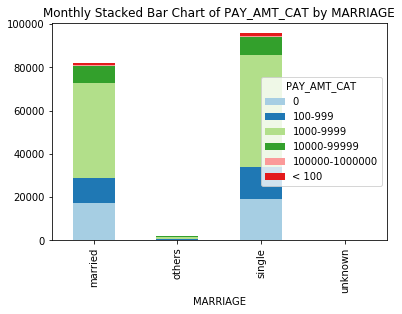

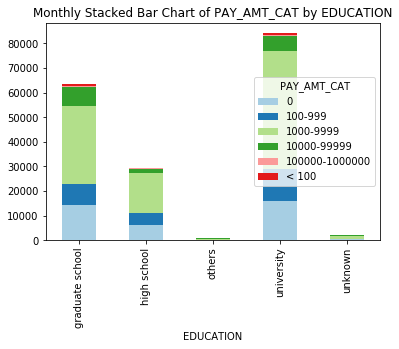

In [202]:
draw_bar(df, 'PAY_AMT_CAT')

#Monthly Paid $ 1000-9999 

<Figure size 432x288 with 0 Axes>

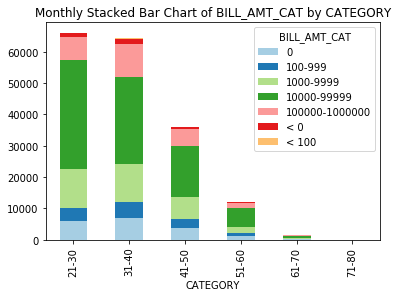

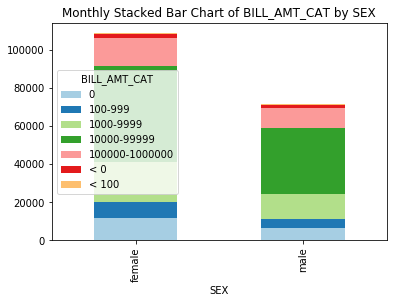

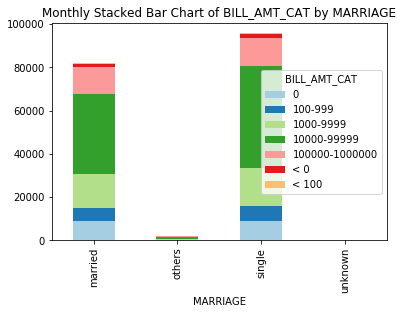

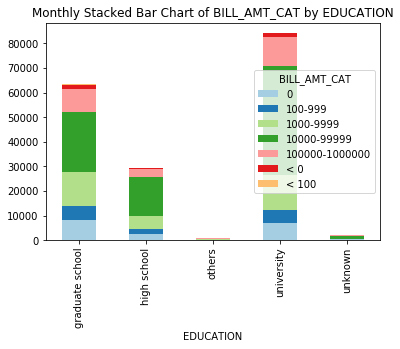

In [203]:
draw_bar(df, 'BILL_AMT_CAT')

#Monthly Billed $10000-99999 

<Figure size 432x288 with 0 Axes>

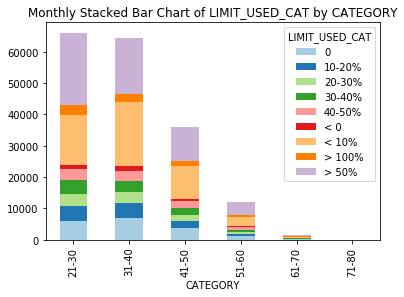

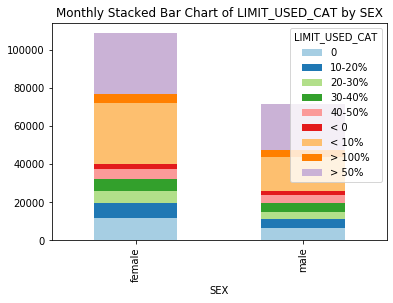

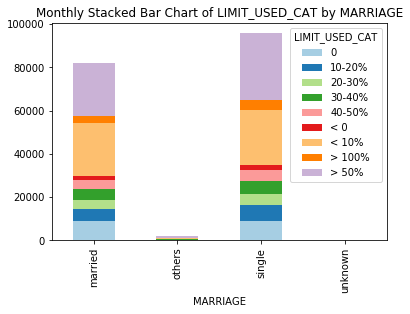

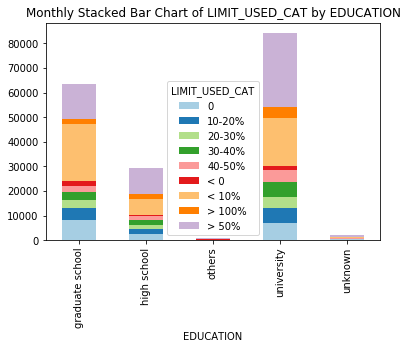

In [204]:
draw_bar(df, 'LIMIT_USED_CAT')

#Monthly credit utilization >50% and <10% 

<Figure size 432x288 with 0 Axes>

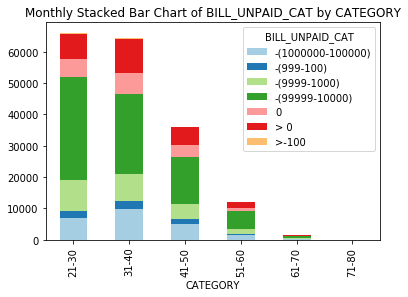

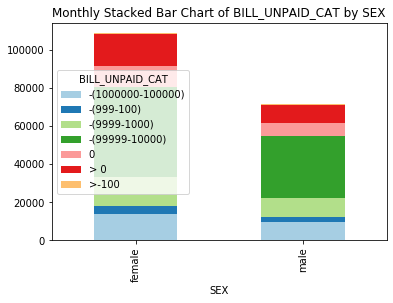

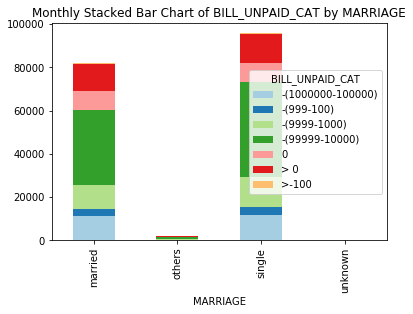

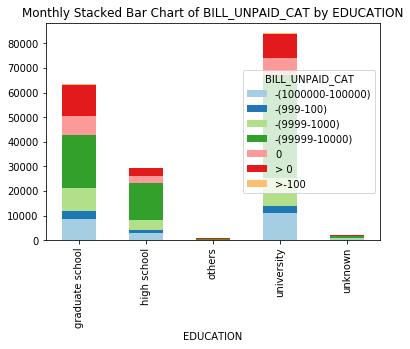

In [205]:
draw_bar(df, 'BILL_UNPAID_CAT')

#Monthly Debt 10000-99999 

<Figure size 432x288 with 0 Axes>

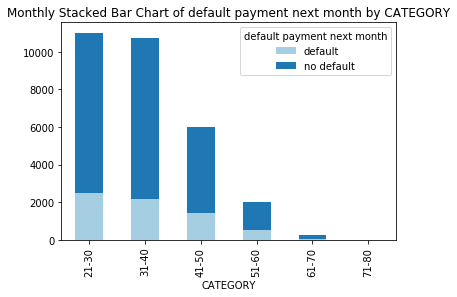

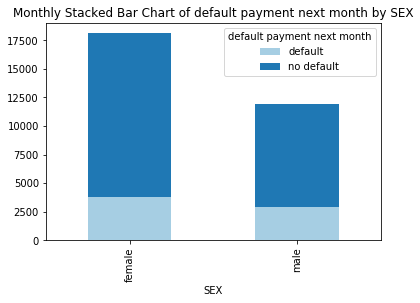

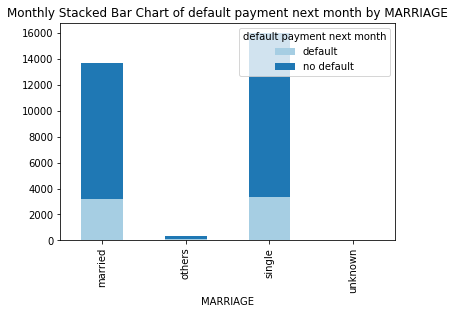

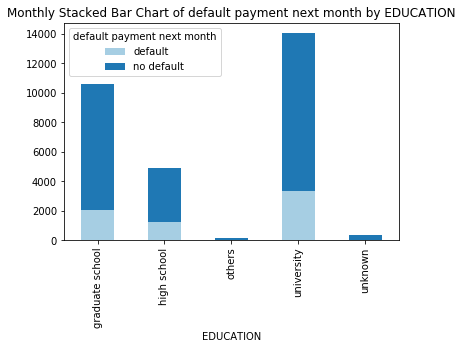

In [206]:
draw_bar(df0, 'default payment next month')

#Default payment next month: no default the most

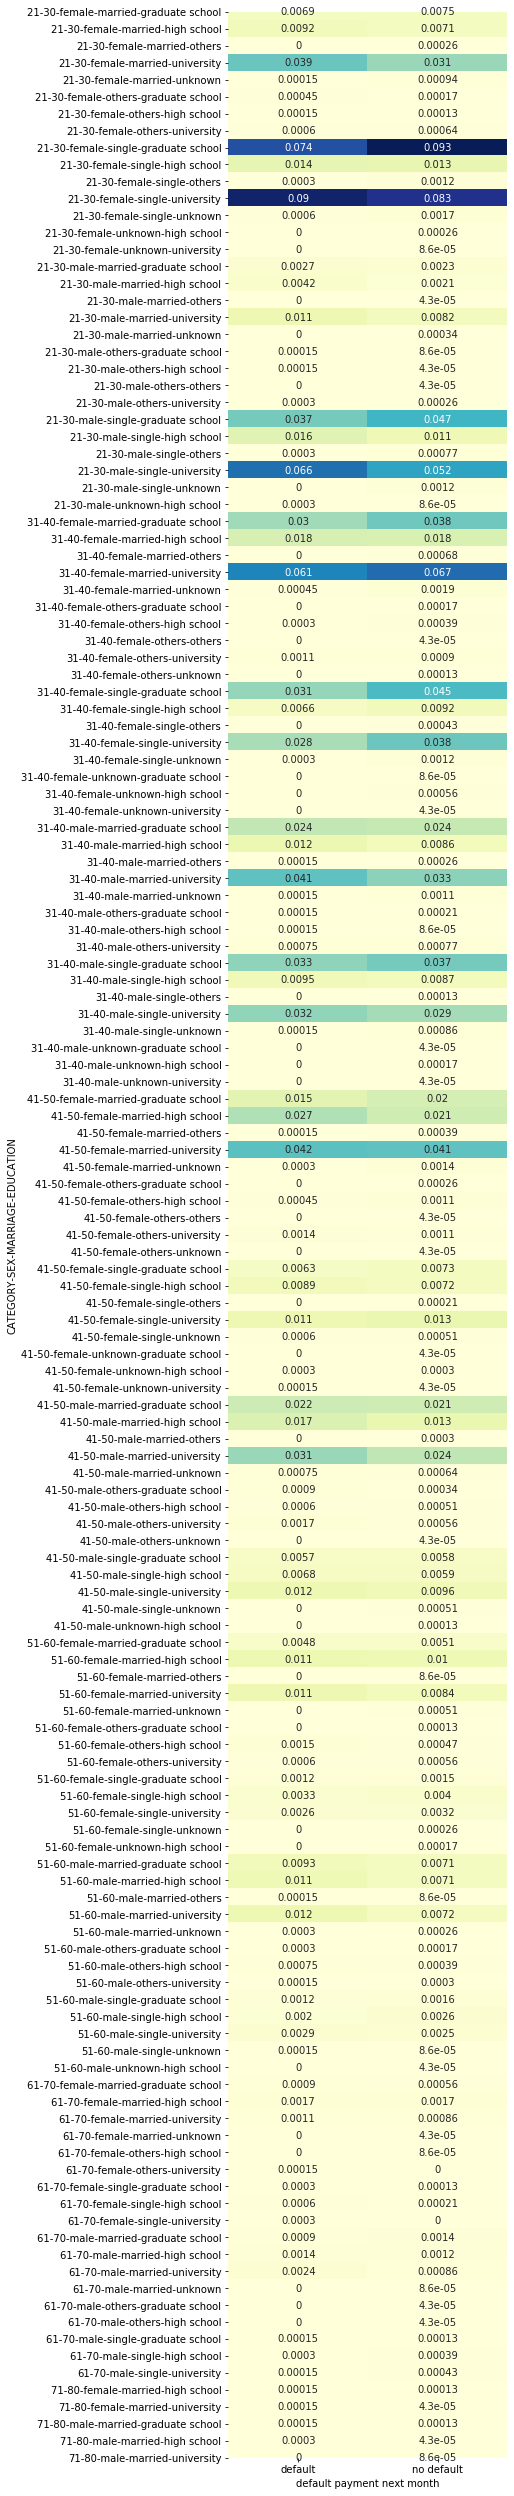

In [72]:
#Default payment next month vs demographics column-wise

plt.figure(figsize = (5,45))

sns.heatmap(pd.crosstab([df0.CATEGORY,df0.SEX,df0.MARRIAGE,df0.EDUCATION],\
                        df0['default payment next month'], normalize='columns'),\
               cmap="YlGnBu", annot=True, cbar=False)

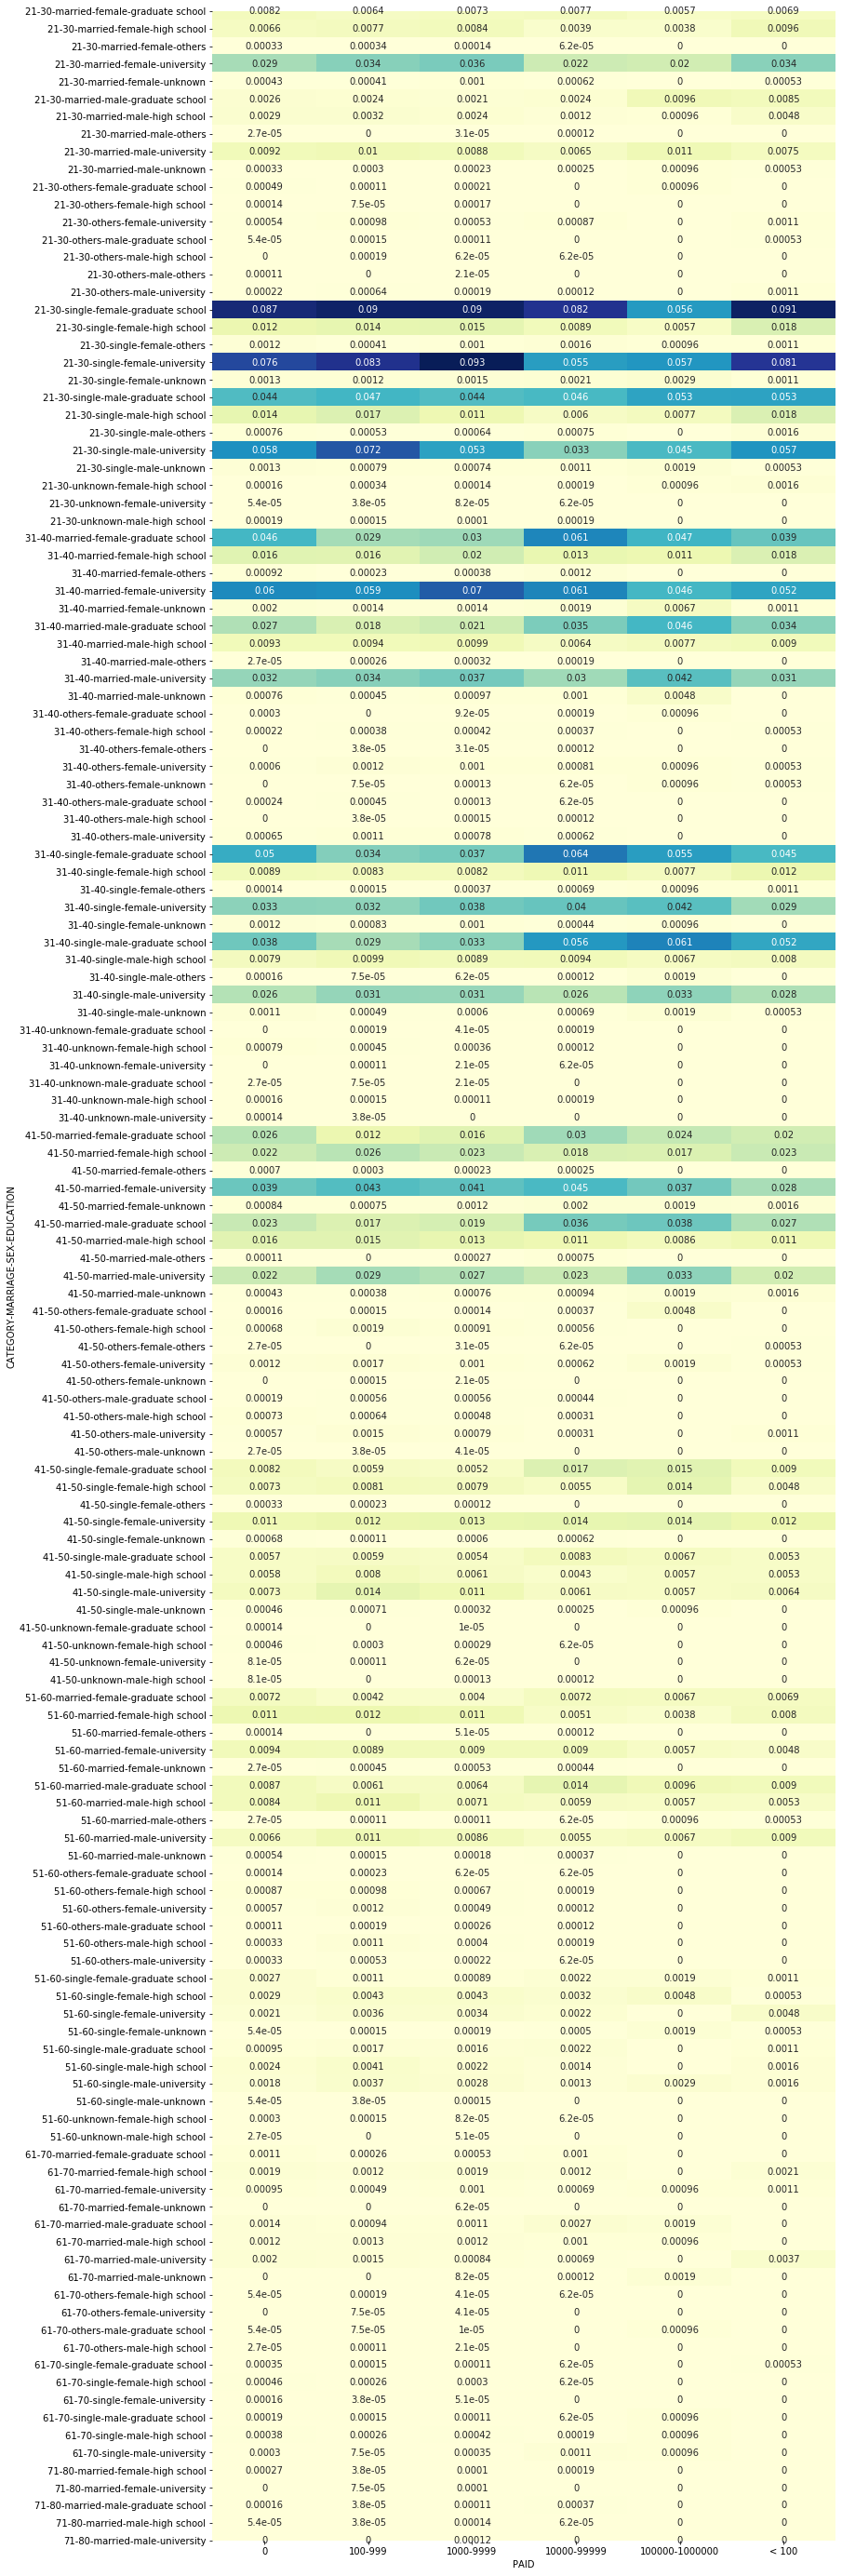

In [53]:
#pay_amt_cat vs demographic column-wise

plt.figure(figsize=(12,50))

sns.heatmap(pd.crosstab([df.CATEGORY, df.MARRIAGE, df.SEX, df.EDUCATION], \
                        df.PAY_AMT_CAT, colnames=['PAID'],\
                        normalize='columns'),cmap="YlGnBu", \
            annot=True, cbar=False)

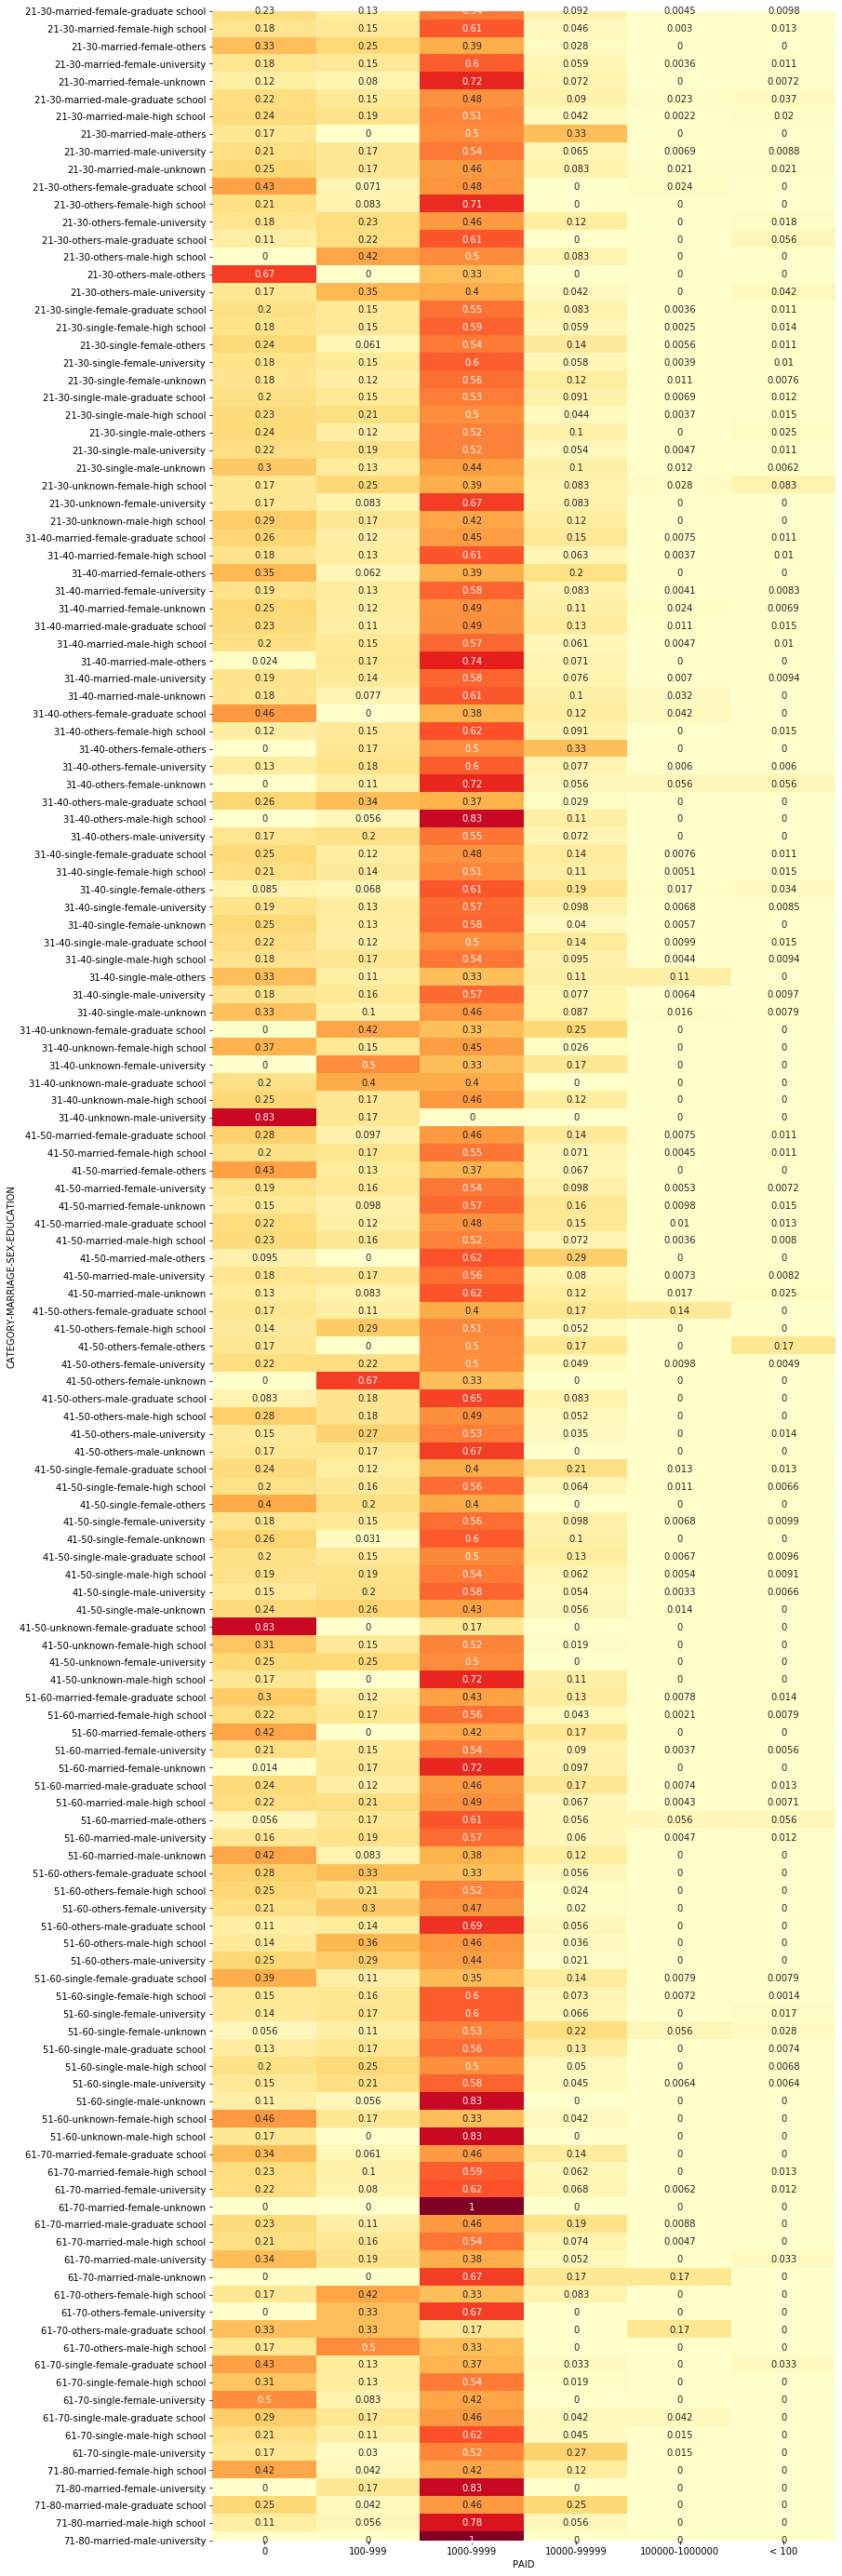

In [54]:
#pay_amt_cat vs demographic row-wise

plt.figure(figsize=(12,50))

sns.heatmap(pd.crosstab([df.CATEGORY, df.MARRIAGE, df.SEX, df.EDUCATION], \
                        df.PAY_AMT_CAT, colnames=['PAID'],\
                        normalize='index'),cmap="YlOrRd", \
            annot=True, cbar=False)

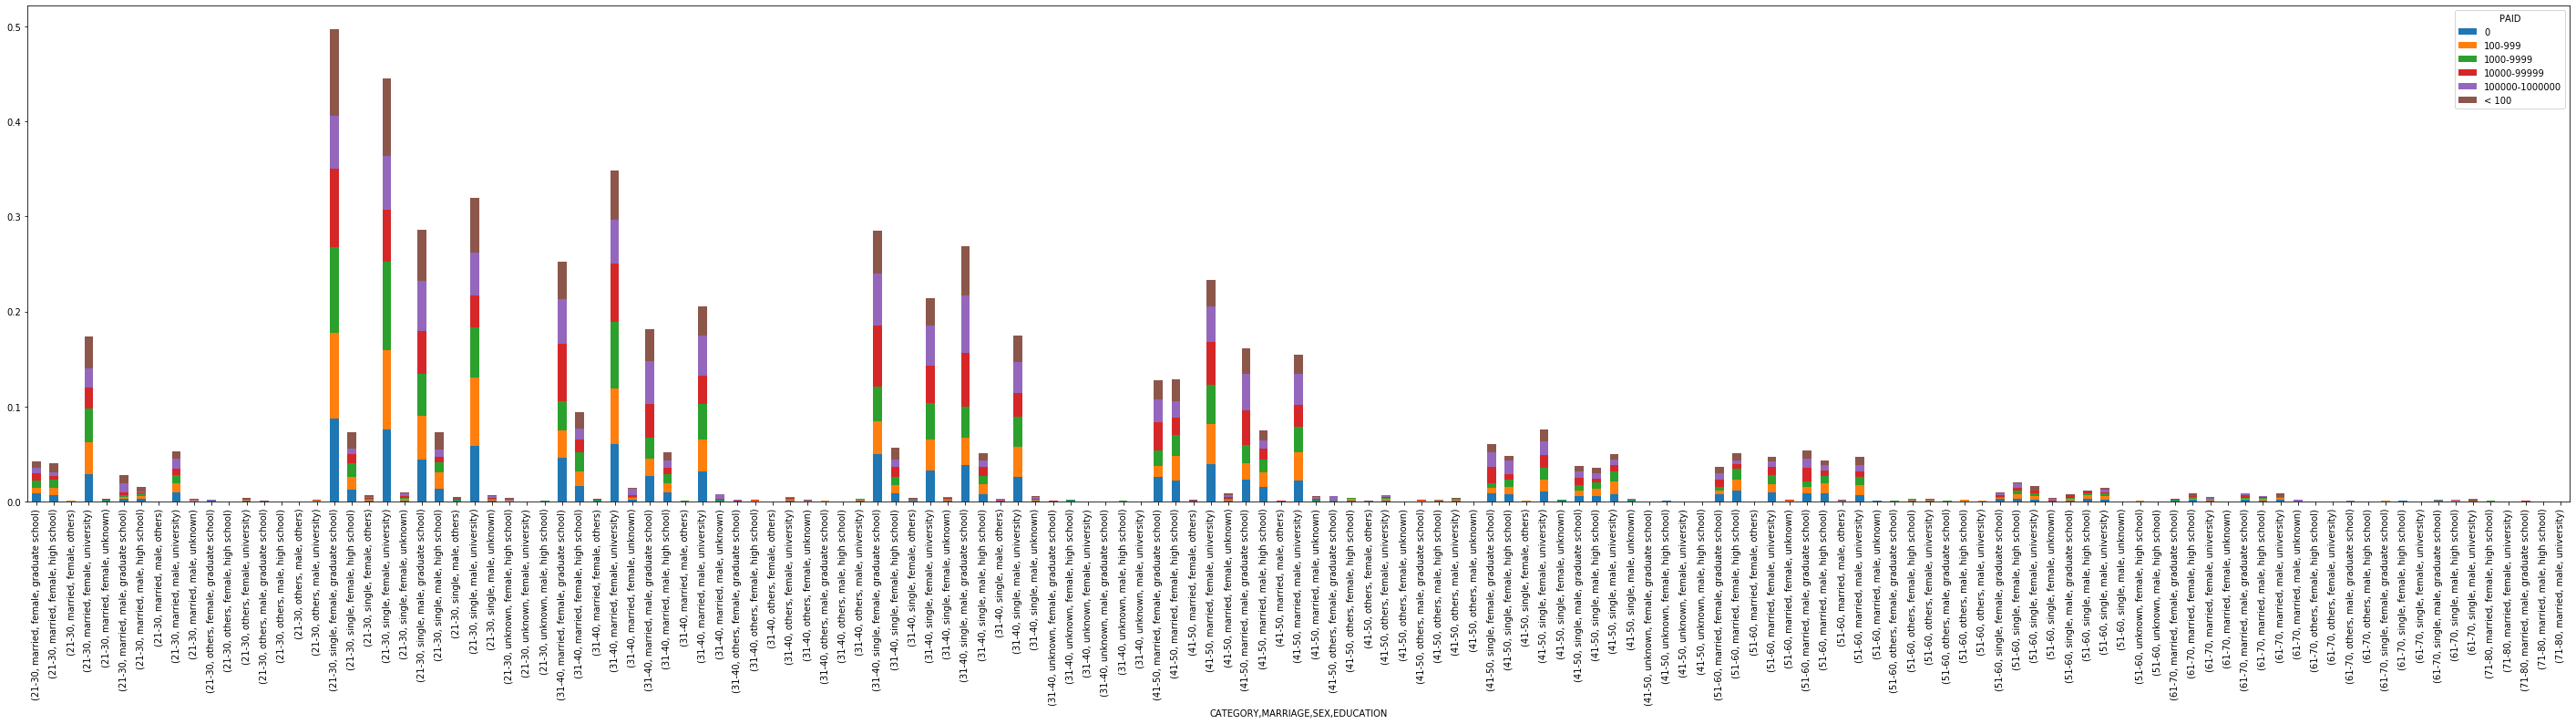

In [42]:
#pay_amt_cat vs demographic column-wise stacked bar charts

pd.crosstab([df.CATEGORY, df.MARRIAGE, df.SEX, df.EDUCATION], \
                        df.PAY_AMT_CAT, colnames=['PAID'],\
                        normalize='columns').plot(kind='bar', stacked='True', figsize=(50,10), fontsize=10)

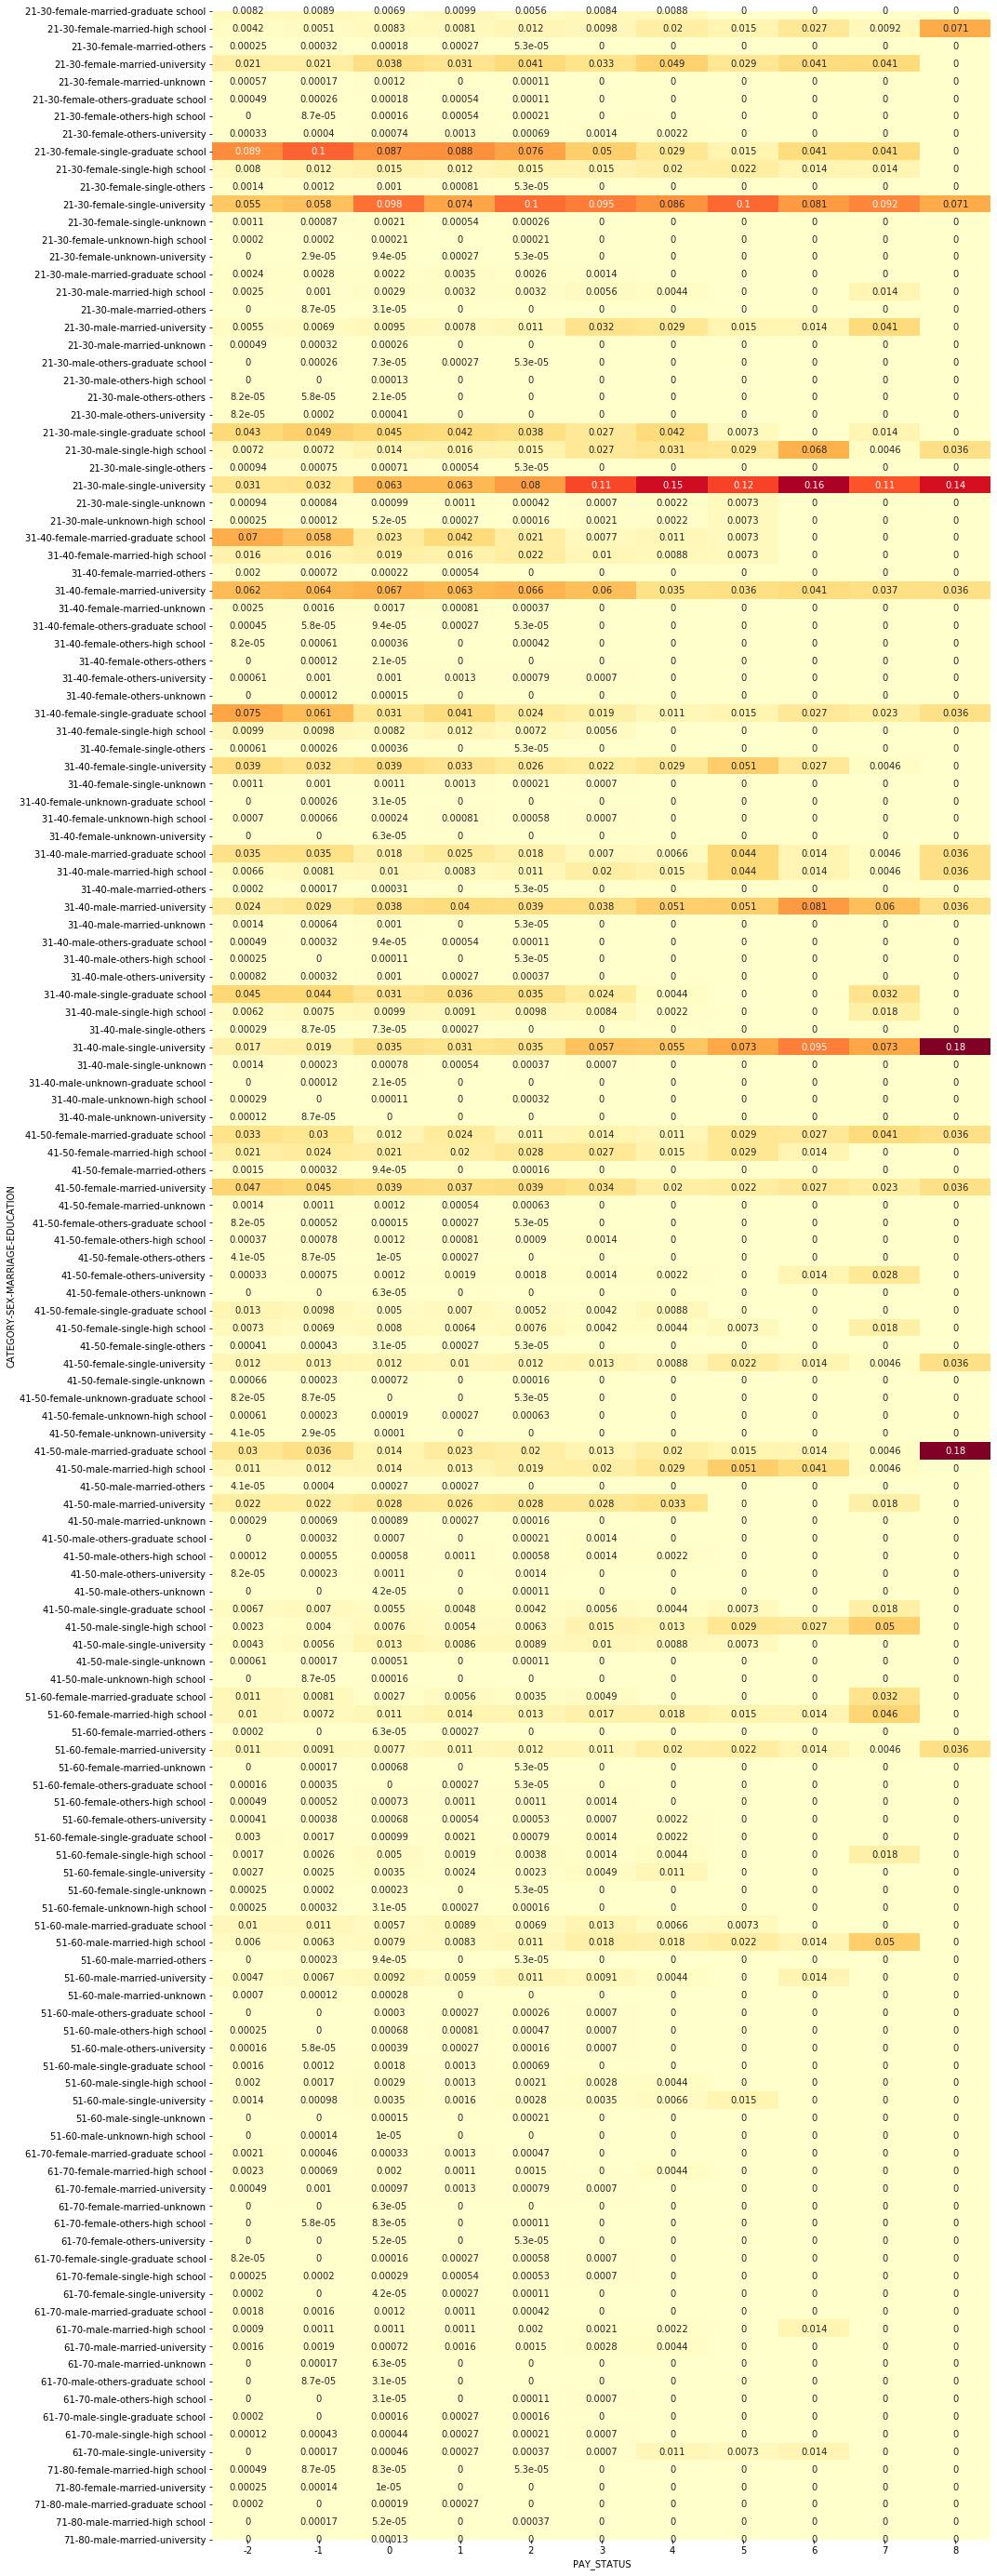

In [43]:
#PAY_STATUS vs demographics column-wise

plt.figure(figsize = (15,50))

sns.heatmap(pd.crosstab([df.CATEGORY, df.SEX, df.MARRIAGE, df.EDUCATION], df.PAY_STATUS, \
                        normalize='columns'), cmap='YlOrRd', annot=True, cbar=False)

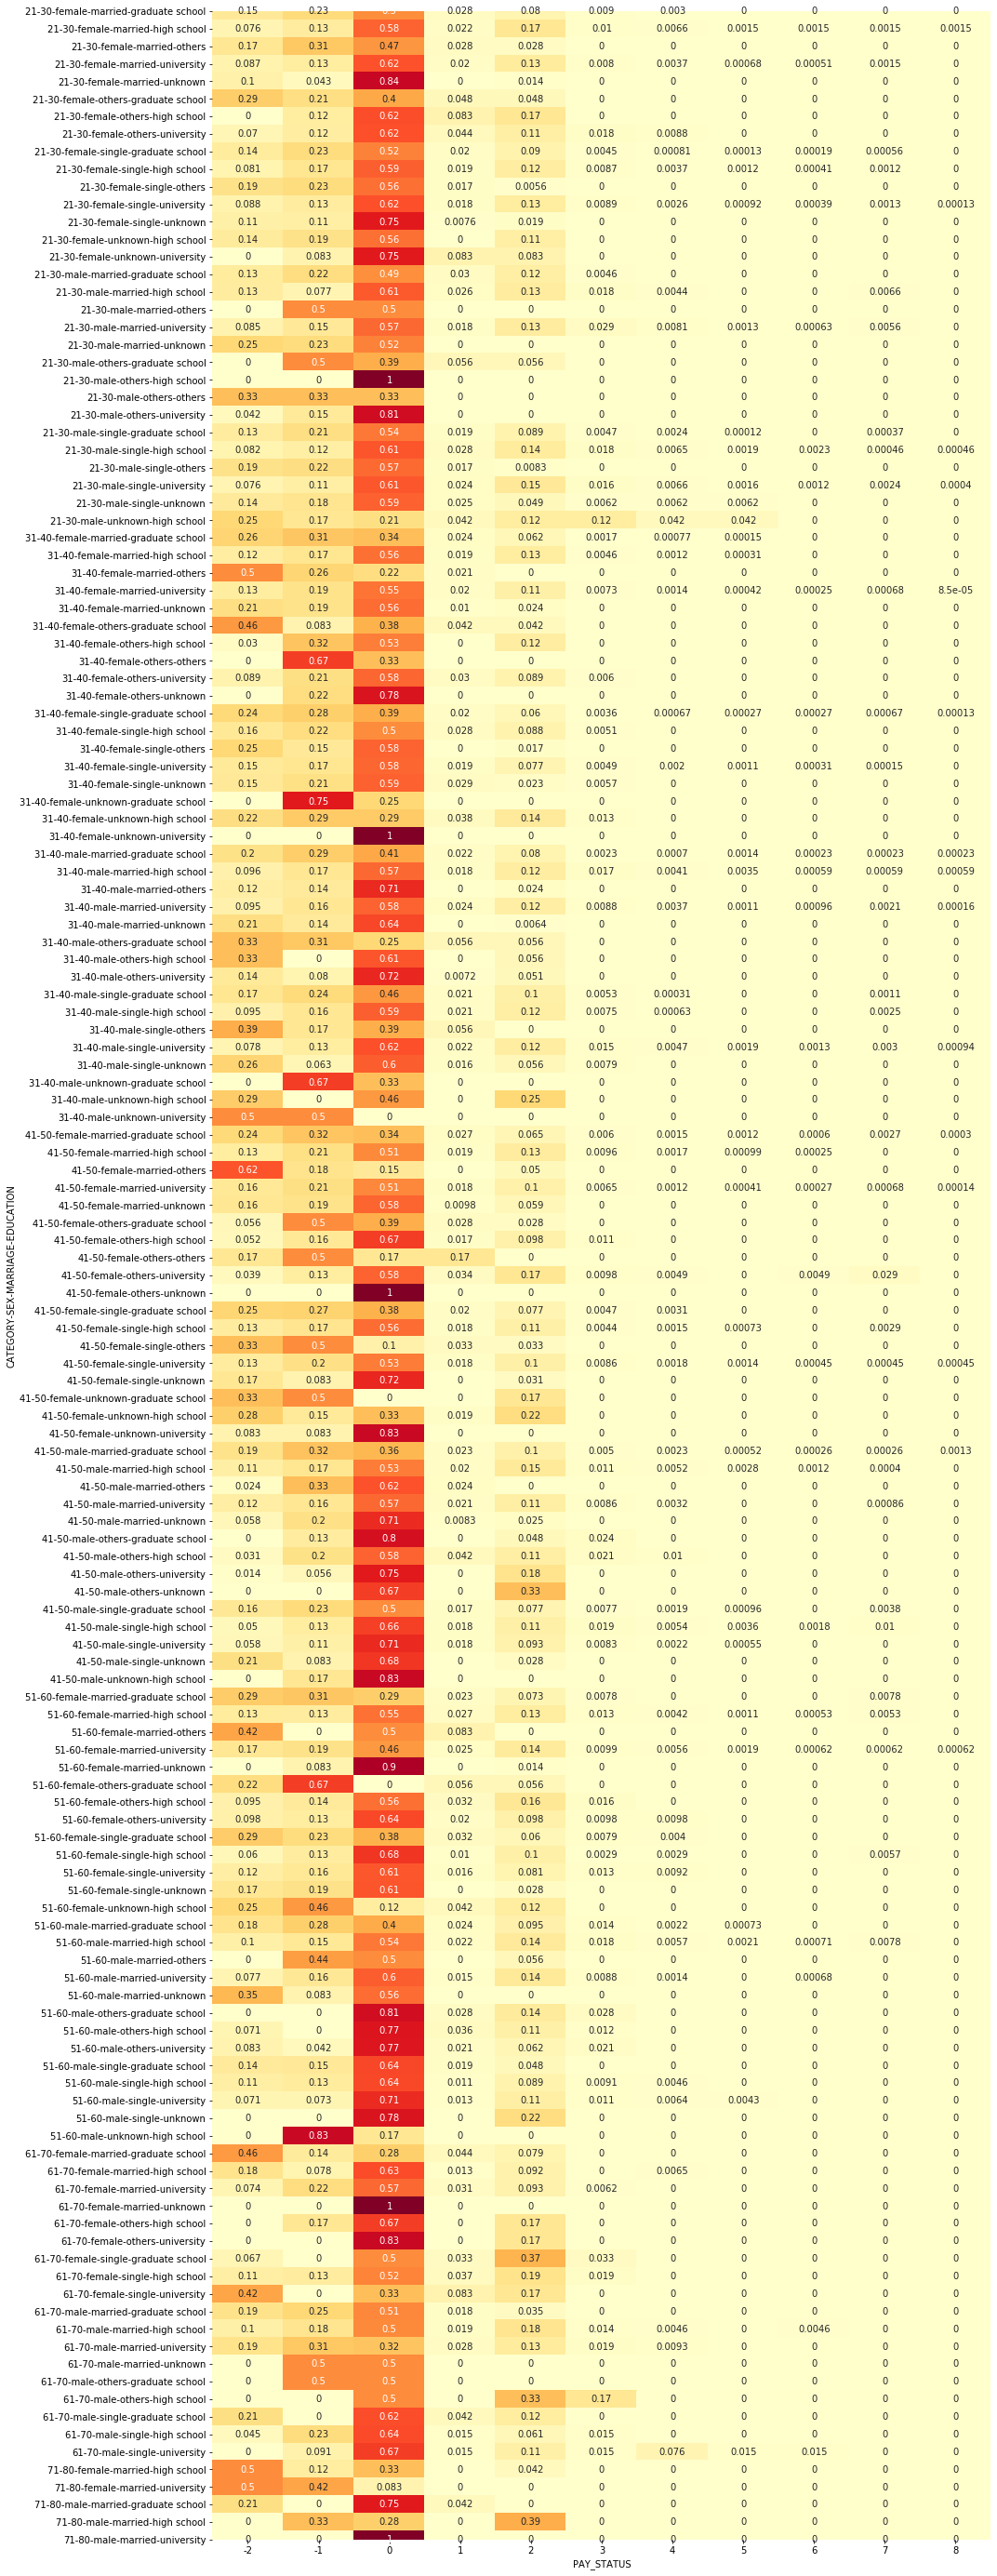

In [44]:
#PAY_STATUS vs demographics row-wise

plt.figure(figsize = (15,50))

sns.heatmap(pd.crosstab([df.CATEGORY, df.SEX, df.MARRIAGE, df.EDUCATION], df.PAY_STATUS, \
                        normalize='index'), cmap='YlOrRd', annot=True, cbar=False)

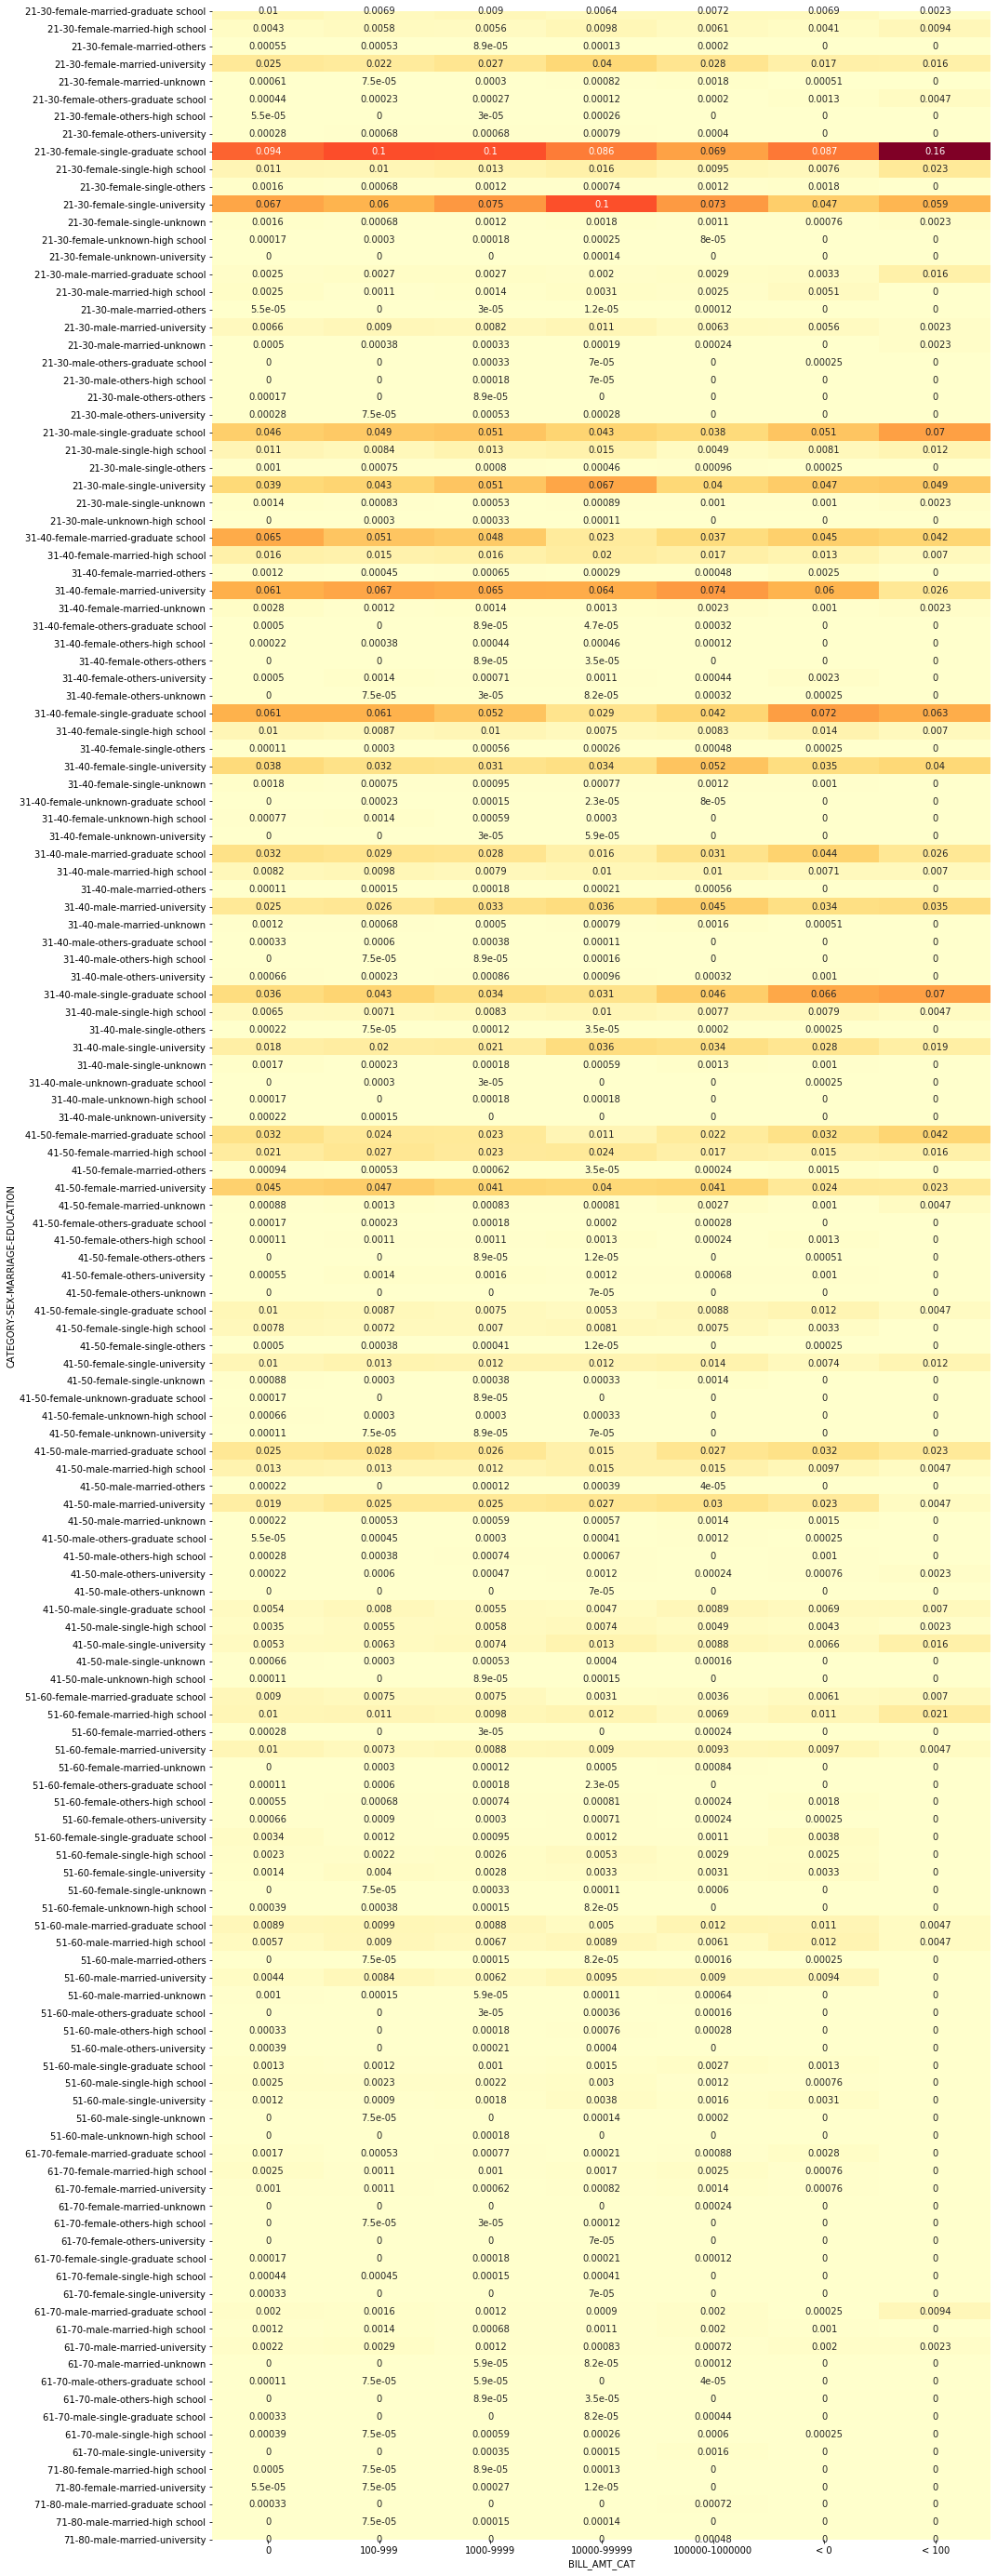

In [45]:
#BILL_AMT_CAT vs demographics

plt.figure(figsize = (15,50))

sns.heatmap(pd.crosstab([df.CATEGORY, df.SEX, df.MARRIAGE, df.EDUCATION], \
                        df.BILL_AMT_CAT, normalize='columns'), cmap='YlOrRd',\
            annot=True, cbar=False) 

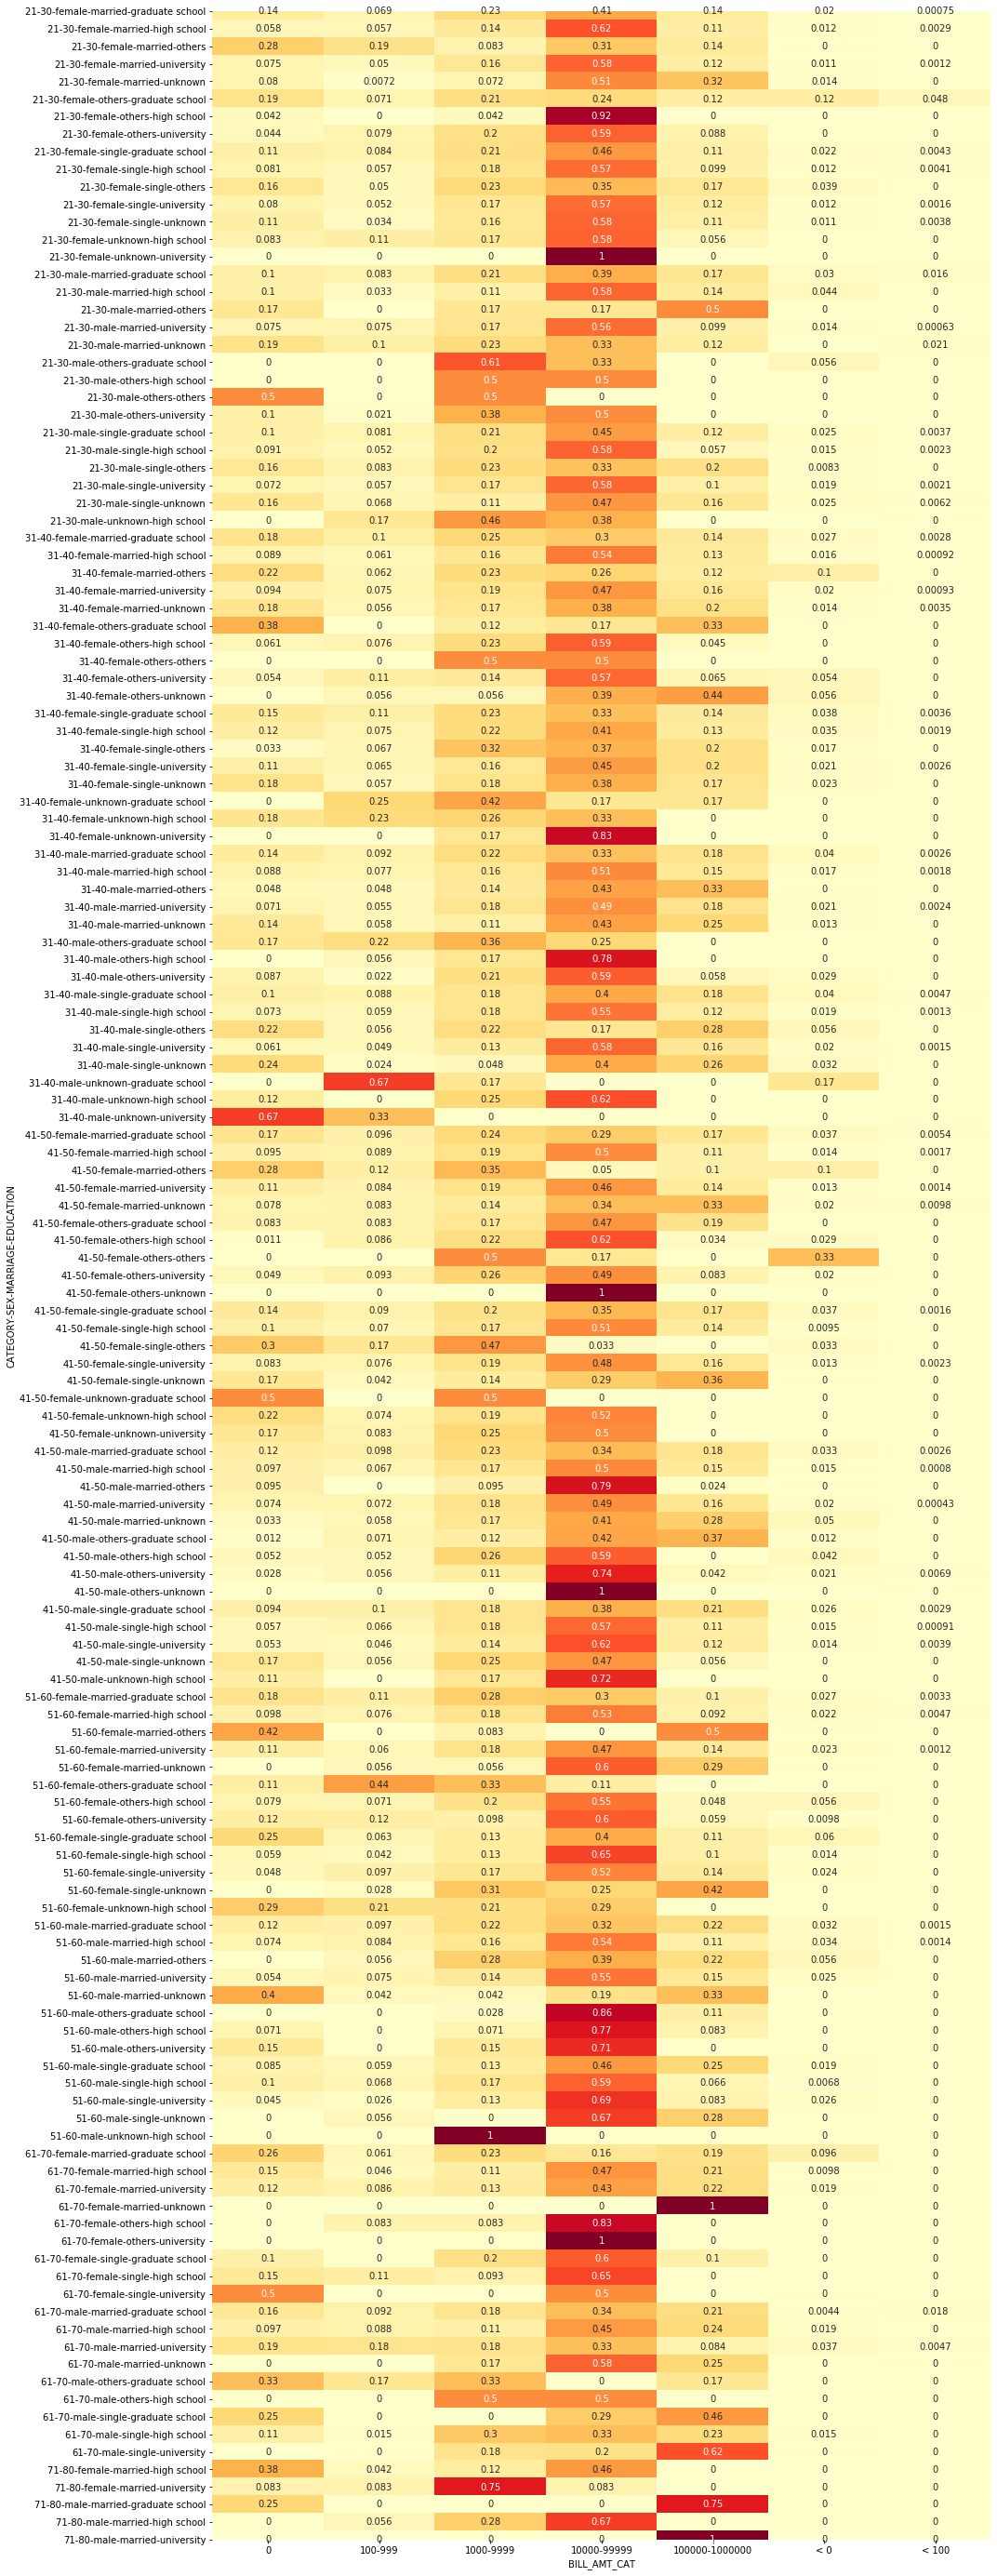

In [46]:
#BILL_AMT_CAT vs demographics row-wise

plt.figure(figsize = (15,50))

sns.heatmap(pd.crosstab([df.CATEGORY, df.SEX, df.MARRIAGE, df.EDUCATION], \
                        df.BILL_AMT_CAT, normalize='index'), cmap='YlOrRd',\
            annot=True, cbar=False) 

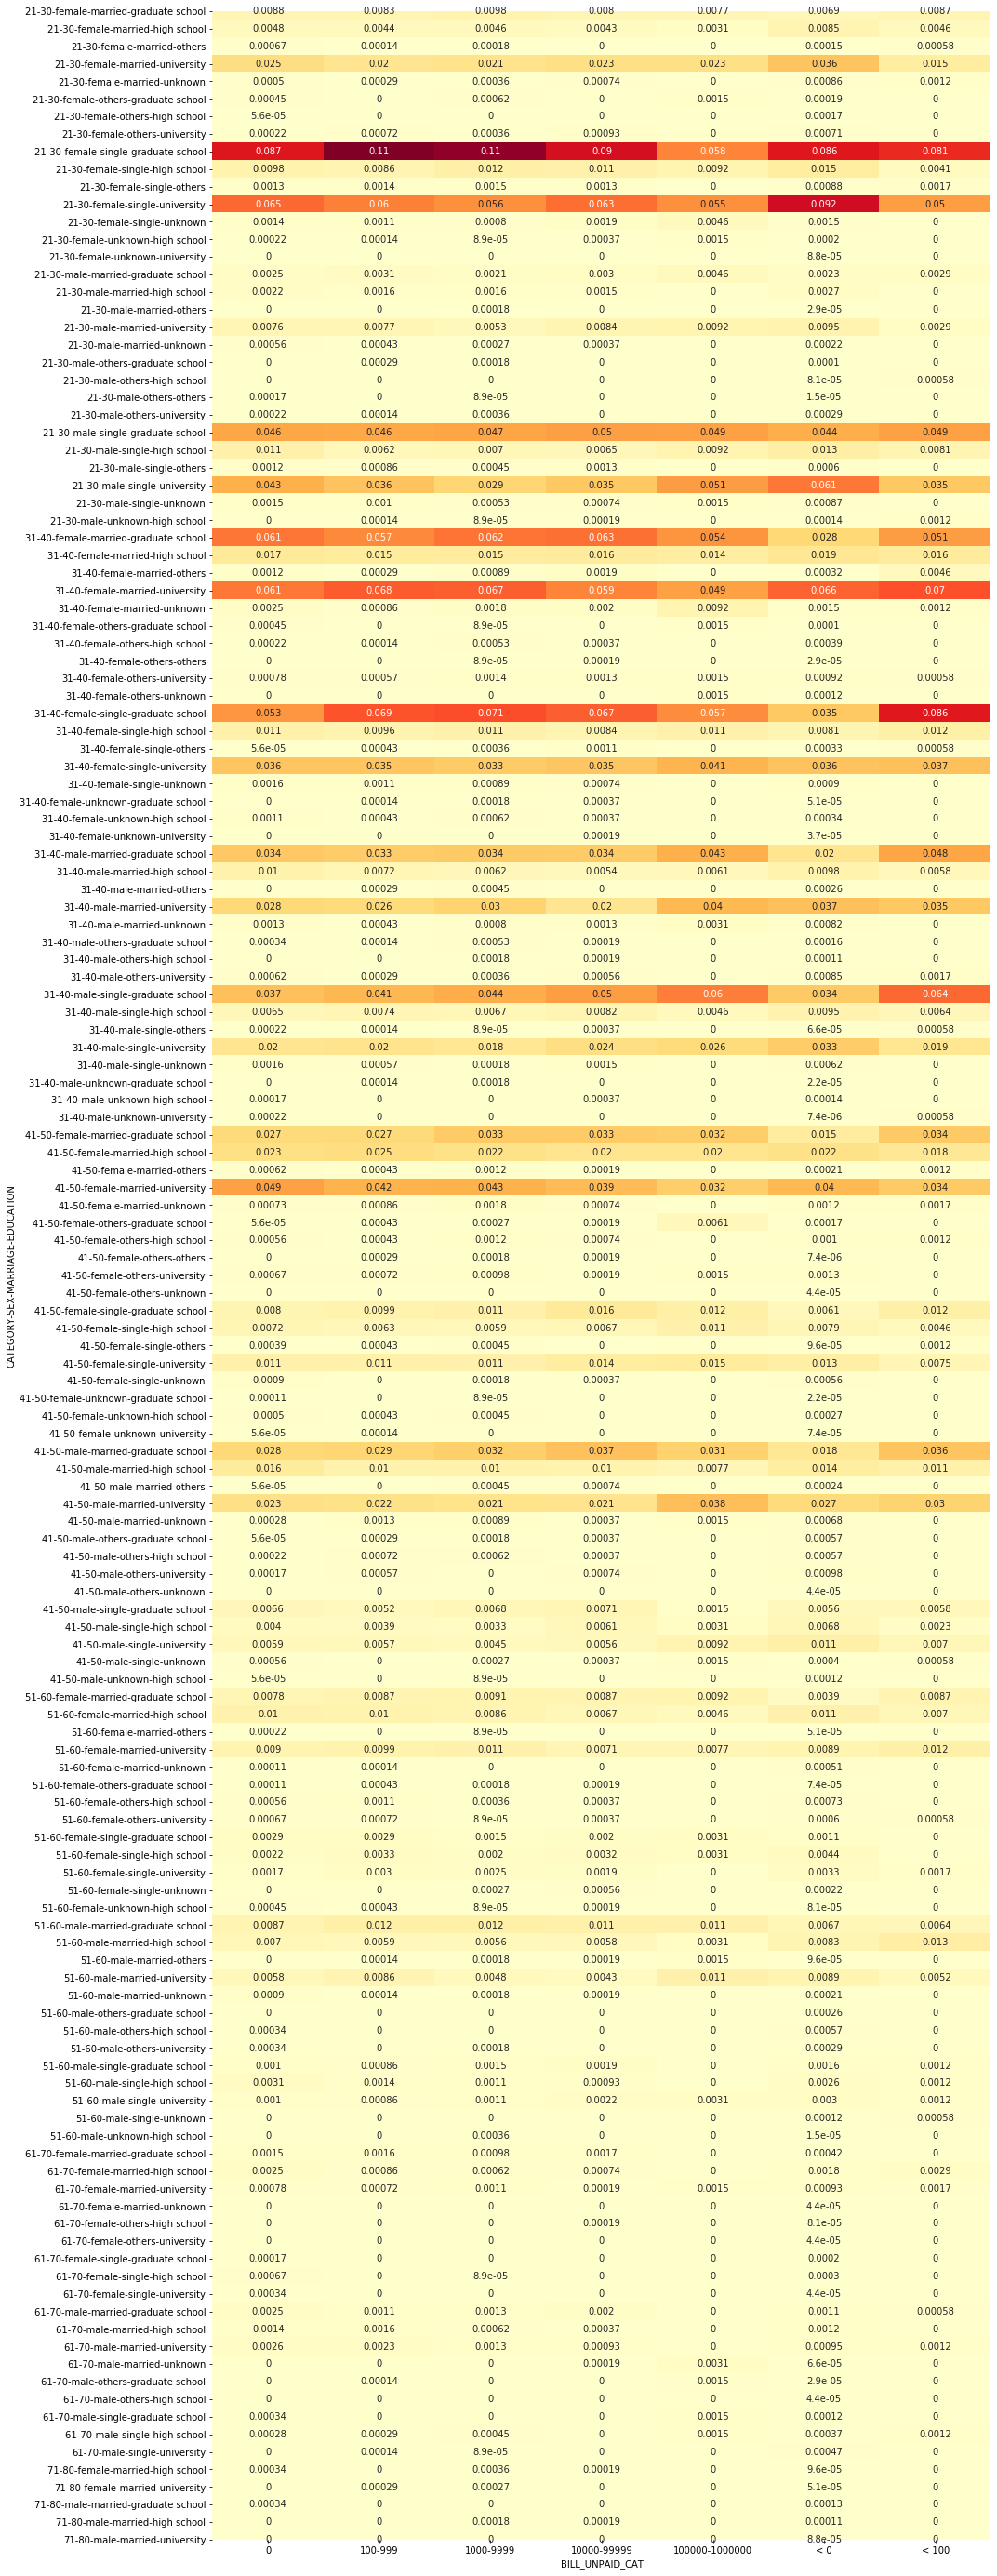

In [47]:
#BILL_UNPAID_CAT vs demographics column-wise

plt.figure(figsize = (15,50))

sns.heatmap(pd.crosstab([df.CATEGORY, df.SEX, df.MARRIAGE, df.EDUCATION], \
                        df.BILL_UNPAID_CAT, normalize='columns'), cmap='YlOrRd',\
            annot=True, cbar=False) 

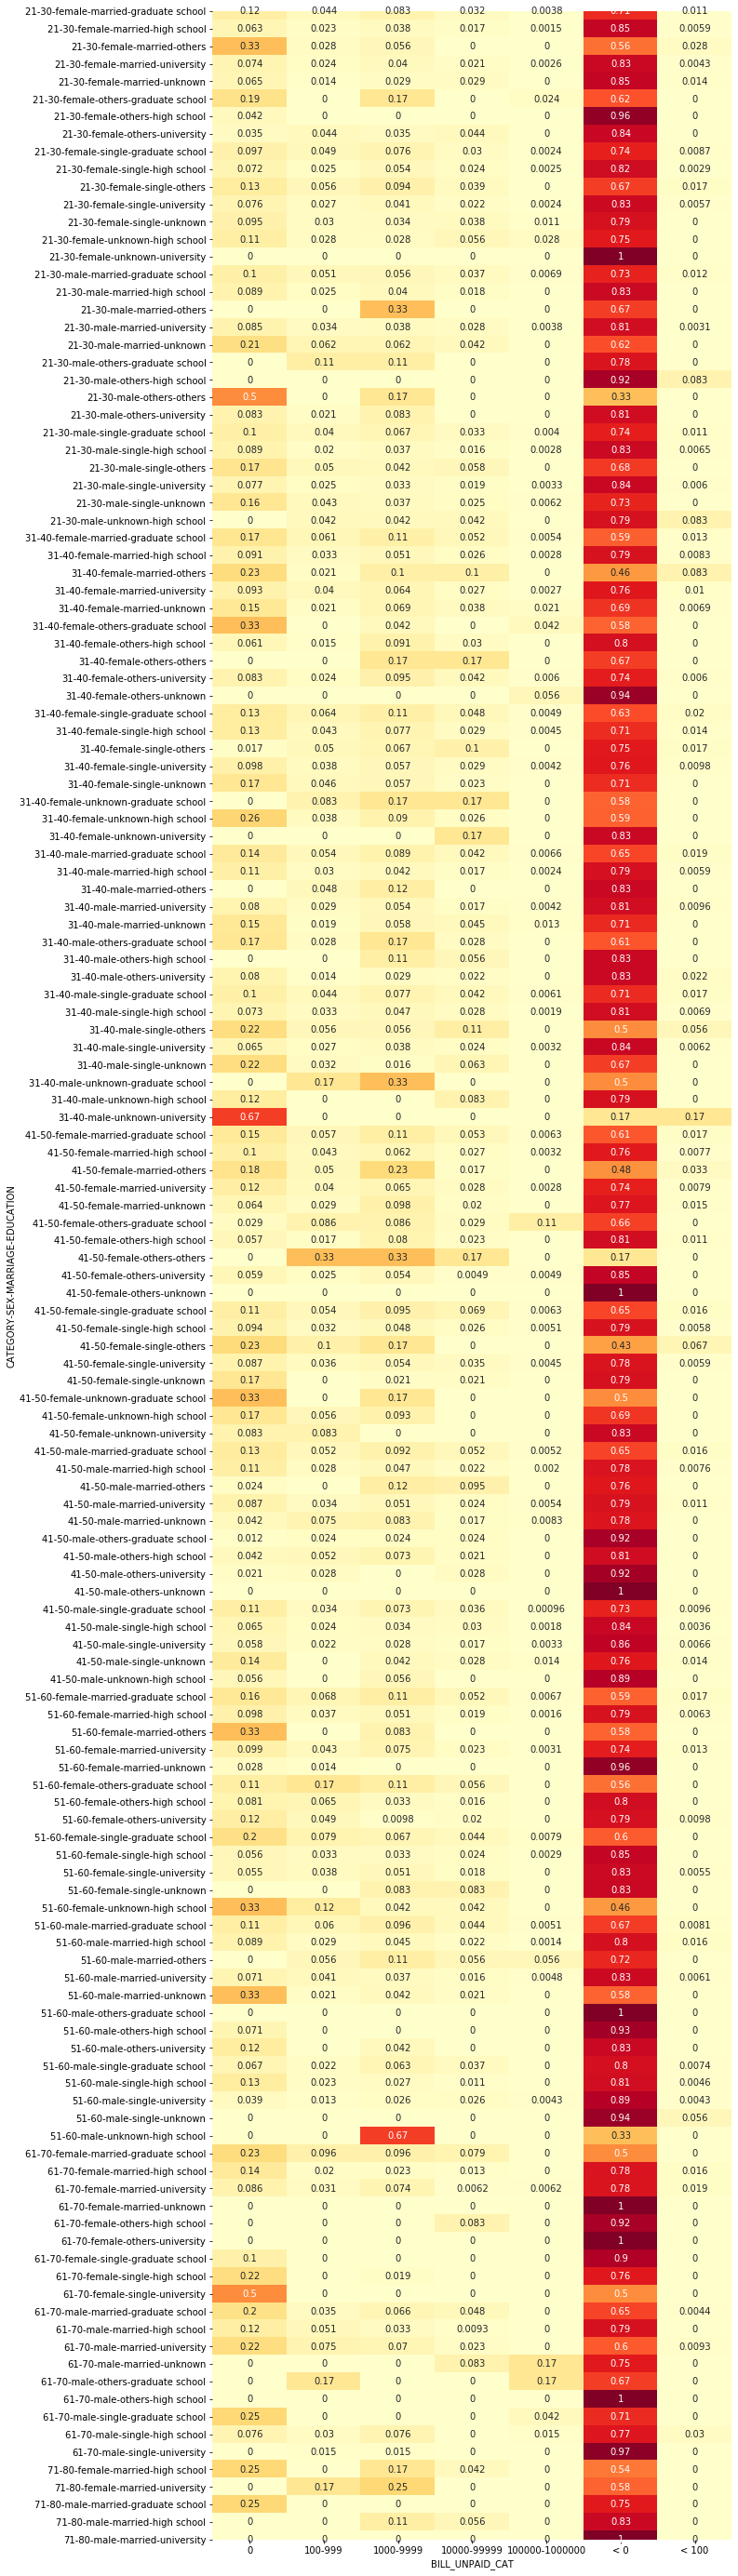

In [48]:
#BILL_UNPAID_CAT vs demographics row-wise

plt.figure(figsize = (10,50))

sns.heatmap(pd.crosstab([df.CATEGORY, df.SEX, df.MARRIAGE, df.EDUCATION], \
                        df.BILL_UNPAID_CAT, normalize='index'), cmap='YlOrRd',\
            annot=True, cbar=False) 

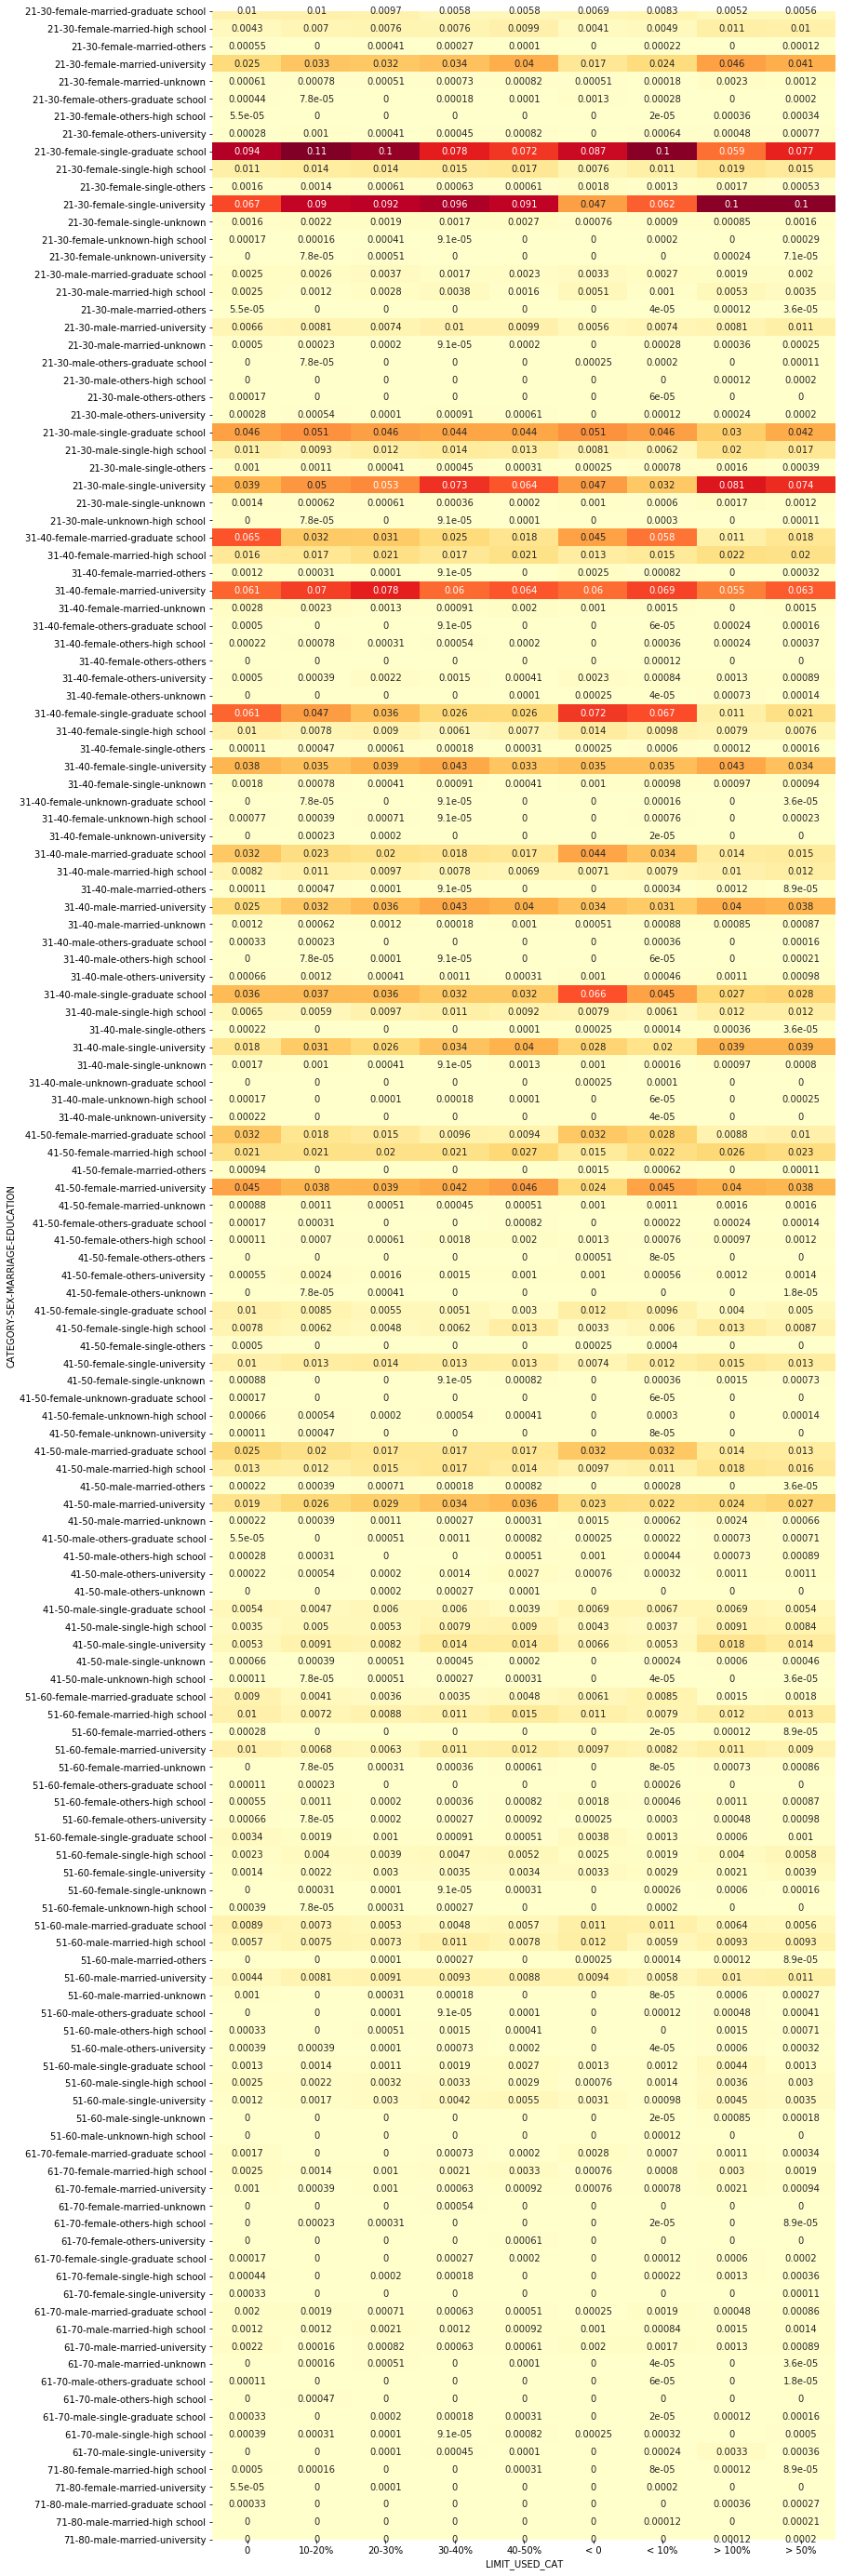

In [49]:
#LIMIT_USED_CAT vs demographics column-wise

plt.figure(figsize = (12,50))

sns.heatmap(pd.crosstab([df.CATEGORY, df.SEX, df.MARRIAGE, df.EDUCATION], \
                        df.LIMIT_USED_CAT, normalize='columns'), cmap='YlOrRd', \
            annot=True, cbar=False) 

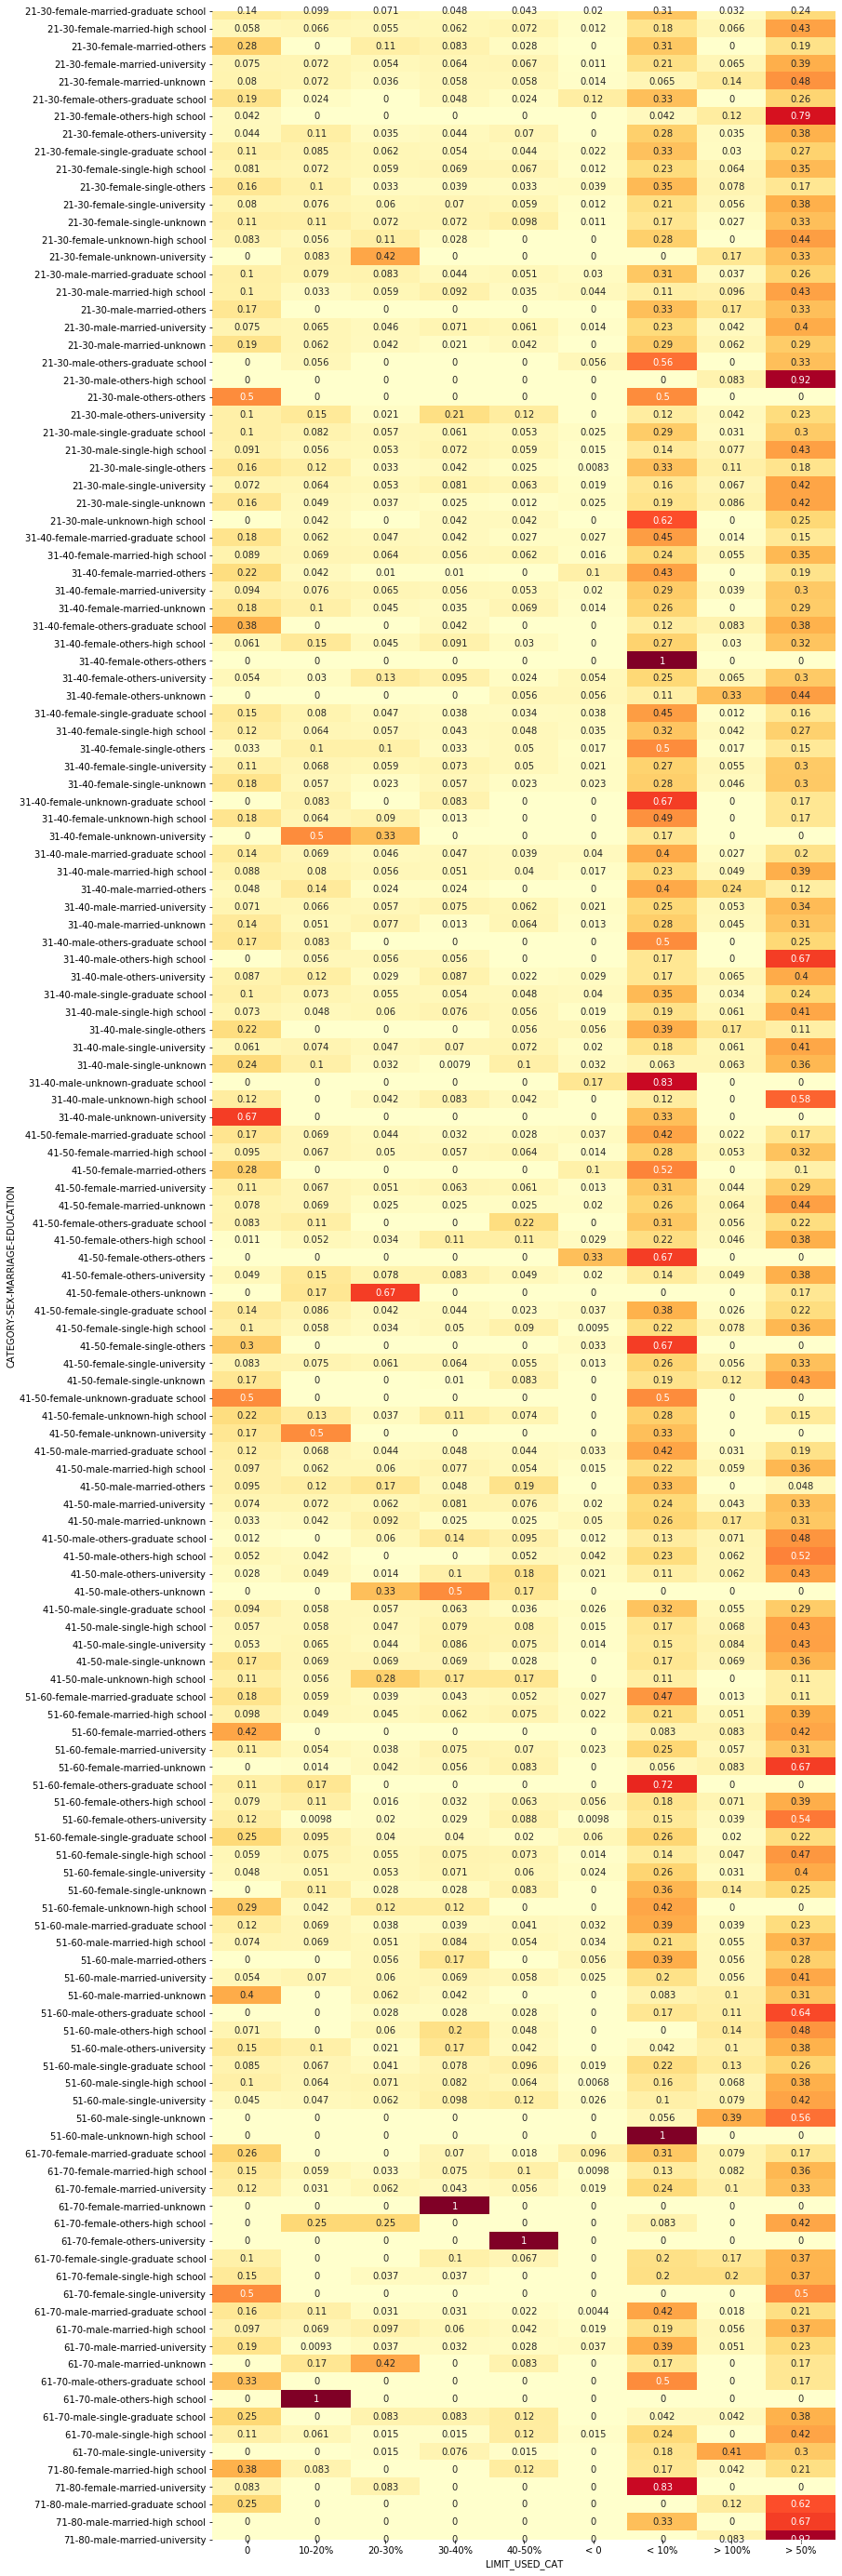

In [50]:
#LIMIT_USED_CAT vs demographics row-wise

plt.figure(figsize = (12,50))

sns.heatmap(pd.crosstab([df.CATEGORY, df.SEX, df.MARRIAGE, df.EDUCATION], \
                        df.LIMIT_USED_CAT, normalize='index'), cmap='YlOrRd', \
            annot=True, cbar=False) 